## Temperature Trends

### Udacity project submission by Laimonas Simutis

In this notebook we will explore temperature measurements that were provided by the course and compare the average temperature trends in the world as well as a city of our choosing. I picked Vilnius, Lithuania as it is the closest city to where I was born.

Data was given to us in a CSV export which we manually saved from Udacity's website. The rest of the analysis I decided to do using Jupyter Notebook, something that I used in Udacity's courses in the past.

The steps taken are discussed below.

## Implementation

## Getting the data

The data was obtained from the udacity provided data source by running SQL queries and then using interface provided export to CSV functionality.

The following query was run to get Vilnius data:

```select * from city_data where city = 'Vilnius';```

And this was run to get the world's temperature data:

```select * from global_data;```

## Analysis

We first being with importing pandas, matplotlib, and seaborn. Pandas can load CSV data and plot it, matplotlib is for plot styling and plotting, and seaborn makes the plots look nicer.

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

We then can read the data into pandas data frames. I have two files, one for the city of Vilnius and one for global tempertures. Once loaded, I like to quickly take a look at each data frame and see what values and column it contains.

We see that it has the year and avg_temp column that we want to plot.

One thing of note is that some temperature values are missing. I have read that you can fill in the missing values using various strategies (replace with average value of a column, etc) but let's see if we will even need that once we plot things.

In [4]:
vilnius = pd.read_csv("vilnius.csv")
world = pd.read_csv("global.csv")

print(vilnius.head())

print(world.head())

   year     city    country  avg_temp
0  1743  Vilnius  Lithuania      1.43
1  1744  Vilnius  Lithuania      7.62
2  1745  Vilnius  Lithuania     -3.83
3  1746  Vilnius  Lithuania       NaN
4  1747  Vilnius  Lithuania       NaN
   year  avg_temp
0  1750      8.72
1  1751      7.98
2  1752      5.78
3  1753      8.39
4  1754      8.47


As it was mentioned in class, plotting averages as is would result in a noisy graph and hard to see trend lines. So I will add a new column to the data set that is called "avg_temp_rolling" and will plot that column for each year to get a better trend.

Pandas has functionality for calculating rolling averages through a very simple and straightforward API. rolling(window) and then choosing the type of function to perform on a window of data. I picked 10 years via trial and error and seeing what looks best:

In [5]:
vilnius['avg_temp_rolling'] = vilnius['avg_temp'].rolling(10).mean()
world['avg_temp_rolling'] = world['avg_temp'].rolling(10).mean()

Finally, we have the data we need to plot. I will plot both trends in the same plot so that it will be easy to do comparisons and observations:

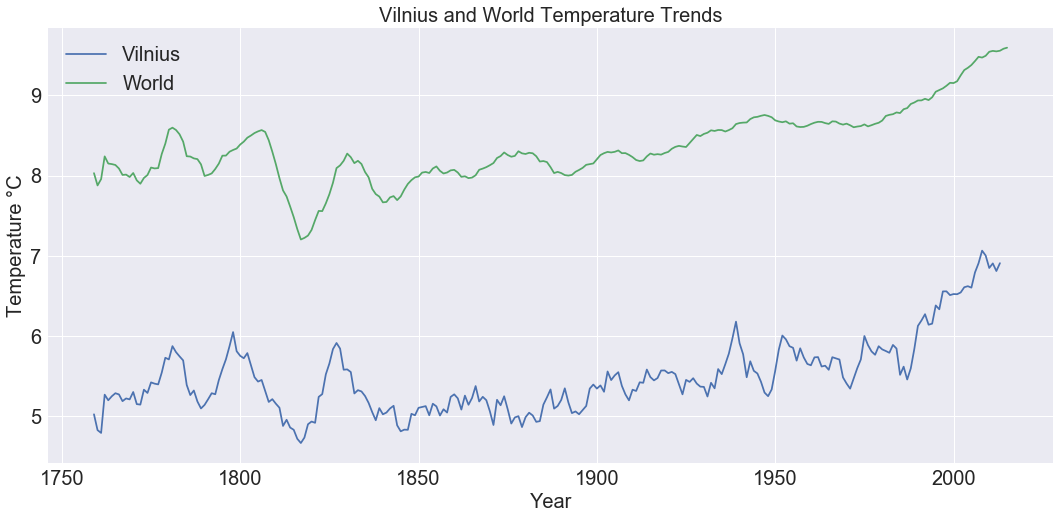

In [12]:
vilnius_plot = vilnius.plot(x='year', y='avg_temp_rolling', figsize=(18, 8), fontsize=20)

world.plot(x='year', y='avg_temp_rolling', ax=vilnius_plot, fontsize=20)

legent = plt.legend(["Vilnius", "World"], fontsize=20)

title = plt.title("Vilnius and World Temperature Trends", fontsize=20)
y = plt.ylabel("Temperature °C", fontsize=20)
x = plt.xlabel("Year", fontsize=20)

## Observations

- In general, Vilnius is colder than the average world temperature reported. It makes sense, there are many cities in warmer type of climates and I would suspect much less in a northern parts of the world that are colder. Vilnius is quite far up north compared to majority of population in the world.

- The difference between the world and Vilnius temperatures has remained consistent, close to 2-3 degree gap.

- Both Vilnius and the world temperatures overall stayed consistent until right mid-80s after which it begins to rise.

- The world has been getting hotter right around from 1850s with the rise picking up pace in the last 30-40 years.